In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import os

import matplotlib.pyplot as plt

import class_helper
%aimport class_helper


# Correlated features
Consider the following set of examples with $2$ features

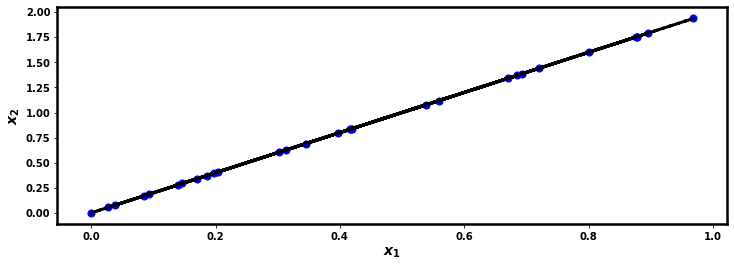

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

m = 30
rng = np.random.RandomState(1)
x_1 = rng.rand(m)
x_2 = 2 * x_1

fig, ax = plt.subplots(1,1,figsize=(12,4))
_= ax.scatter( x_1, x_2, color="blue", s=50)
_= ax.plot( x_1, x_2, color="black", linestyle="dashed")
_= ax.set_xlabel("$x_1$")
_= ax.set_ylabel("$x_2$")

As you can see
- $\x_2$ is perfectly correlated with $\x_1$
$$
\x_2^\ip = 2 * \x_1^\ip
$$

A way to conceptualize $\x^\ip$
- As a point in the space spanned by unit basis vectors
$$\begin{array}[lll]\\
\u_{(1)} = (1,0) \\
\u_{(2)} = (0,1) \\
\end{array}
$$
- With $\x^\ip$ having exposure 

$$
\begin{array}[lll]\\
\x^\ip_1 \text{ to } \u_{(1)} \\
\x^\ip_2 \text{ to } \u_{(2)} \\
\end{array}
$$


So example $\x^\ip$ is
$$
\x^\ip = \sum_{j'=1}^2 { \x^\ip_{j'} * \u_{(j')} }
$$

But because
$$
\x_2^\ip = 2 * \x_1^\ip
$$

we can create an *alternate* basis vector
$$
\tilde{\v}_{(1)} = (1,2)
$$

such that example $\x^\ip$ is
$$
\x^\ip = \tilde\x^\ip_1 * \tilde{\v}_{(1)}
$$
where $\tilde\x^\ip_1 = \x^\ip_1$

That is, $\x^\ip$ has exposure $\tilde\x^\ip_1$ to the new, single basis vector.

So 
- Rather than representing $\x^\ip$ as a vector with 2 features (in the original basis)
- We can represent it as $\tilde\x^\ip$, a vector with 1 feature (in the new basis)

This is the essence of dimensionality reduction
- Changing bases to one with fewer basis vectors

It is rarely the case for features to be perfectly correlated


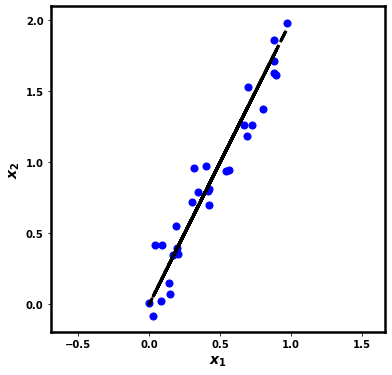

In [5]:
eps = .01
x_2p = 2 * x_1 + .2 * rng.randn( x_1.shape[0] )

x_p = np.concatenate( [ x_1.reshape(-1,1), x_2p.reshape(-1,1)], axis=1)

fig, ax = plt.subplots(1,1,figsize=(6,6))
_= ax.scatter( x_p[:,0], x_p[:,1], color="blue", s=50)
_= ax.plot( x_1, x_2, color="black", linestyle="dashed")
_= ax.set_xlabel("$x_1$")
_= ax.set_ylabel("$x_2$")
_= ax.axis("equal")

In this case
- A second basis vector $\tilde{\v}_{(2)}$
- Orthogonal to the first
$$
\tilde{\v}_{(1)} \cdot \tilde{\v}_{(2)} = 0
$$
 could approximate $\x^\ip$
 $$
\x^\ip = \sum_{j'=1}^2 { \tilde\x^\ip_{j'} * \tilde{\v}_{(j')} }
$$

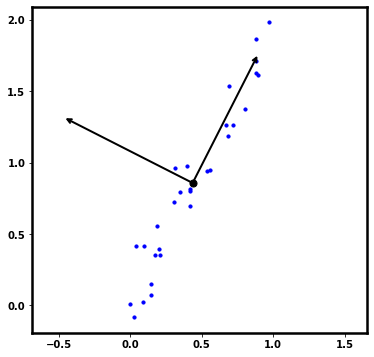

In [6]:
from sklearn.decomposition import PCA
import math

pca_x2p = PCA()
#x_p = x_p - x_p.mean(axis=0)
                    
pca_x2p_proj = pca_x2p.fit_transform(x_p)


def draw_vector(v0, v1, ax=None):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color="black",
                    shrinkA=0, shrinkB=0)
    _ = ax.annotate('', v1, v0, arrowprops=arrowprops)

    return ax

fig, ax = plt.subplots(1,1, figsize=(6,6))
mean = x_p.mean(axis=0)

maxp = np.sqrt( pca_x2p.explained_variance_[-1] )

_= ax.scatter( x_p[:,0], x_p[:,1], color="blue", s=10)

for i in range(0, 2):
    comp, length = pca_x2p.components_[i], pca_x2p.explained_variance_[i]
    v = comp  # *  np.sqrt(length)   
    _= draw_vector( mean, mean + v , ax=ax)
   


_= ax.scatter( mean[0], mean[1], s=50, color="black")

_= ax.axis("equal")


The black lines represent the alternate basis vectors $\tilde{\v}_{(1)}, \tilde{\v}_{(2)}$.

As you can see:
- The variation along $\tilde{\v}_{(1)}$ is much greater than that around $\tilde{\v}_{(2)}$
- Capturing the notion that the "main" relationship is along $\tilde{\u}_{(1)}$

In fact, if we dropped $\tilde{\v}_{(2)}$ such that $|| \tilde\x || = 1$
- The examples would be projected onto $\tilde{\v}_{(1)}$
- With little information being lost

# Subsets of correlated features

It may not be the case that a group of features is correlated across *all* examples

Consider the MNIST digits
- The subset of examples corresponding to the digit "1"
- Have a particular set of correlated features (forming a vertical column of pixels)
- Which *may not* be correlated with the same features in examples corresponding to *other* digits

Thus, a synthetic feature encodes a "concept" that occurs in many but not all examples

The "concept" will be *discovered*
- It may not necessarily be the pattern of features that corresponds to an entire digit
- It may be a partial pattern common to several digits
    - Vertical band (0, 1, 4, 7)
    - Horizontal band at top (5, 7, 9)

In [7]:
print("Done")

Done
